In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [42]:
# Lê o arquivo CSV 'USA_cars_datasets.csv'
df = pd.read_csv('USA_cars_datasets.csv')
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [43]:
# Remove a coluna "Unnamed: 0" do DataFram
df = df.drop("Unnamed: 0", axis=1)

In [44]:
# Exibe um resumo das informações do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   vin           2499 non-null   object 
 8   lot           2499 non-null   int64  
 9   state         2499 non-null   object 
 10  country       2499 non-null   object 
 11  condition     2499 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 234.4+ KB


In [45]:
# Gera estatísticas descritivas das colunas numéricas do DataFrame
df.describe()

,price,year,mileage,lot
count,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [46]:
# Verifica a quantidade de valores nulos (missing) em cada coluna do DataFrame
df.isnull().sum()

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

<Axes: >

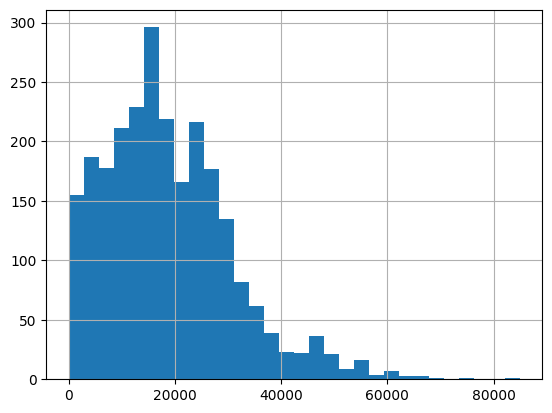

In [47]:
# Cria um histograma da coluna 'price' com 30 intervalos (bins)
df['price'].hist(bins=30)

In [48]:
# Cria um boxplot da coluna 'mileage' usando Plotly Express para visualizar a distribuição e detectar possíveis outliers na quilometragem dos carros
px.box(df, y = "mileage")

In [49]:
# Cria um boxplot da coluna 'price' usando Plotly Express para analisar a distribuição dos preços e identificar possíveis valores extremos (outliers)
px.box(df, y="price")

In [50]:
# Filtra o DataFrame para manter apenas os carros com quilometragem menor que 500.000
df = df[df["mileage"] < 500000]

<Axes: >

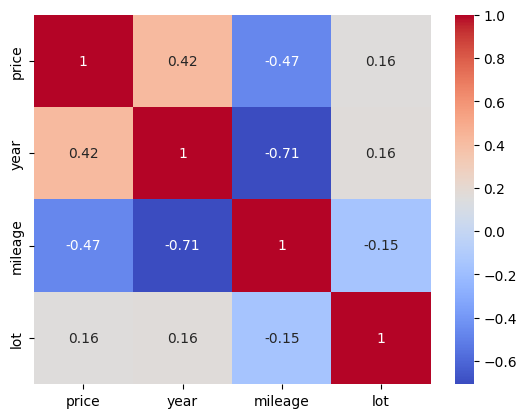

In [51]:
# Cria um mapa de calor (heatmap) das correlações entre as colunas numéricas (float64 e int64) do DataFrame,
# exibindo os valores das correlações (annot=True) com a paleta de cores 'coolwarm' para facilitar a visualização
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')

In [52]:
# Remove a coluna "vin" e "condition" do DataFrame, que contém identificadores únicos de veículos e pode não ser útil para análise
df = df.drop(["vin", "condition"], axis = 1)

In [ ]:
# Aplica o One-Hot Encoding nas colunas categóricas especificadas ("brand", "model", "title_status", "color", "state", "country"),
df = pd.get_dummies(df, columns = ["brand", "model", "title_status", "color", "state", "country"])

In [54]:
# Separa os dados em variáveis independentes (X) e a variável alvo (y), que é o preço dos carros
X = df.drop("price", axis=1)
y = df["price"]

# Divide os dados em conjuntos de treino (80%) e teste (20%) com uma semente aleatória fixa (random_state=42) para reprodutibilidade
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Treina um modelo de RandomForestRegressor com os dados de treino e faz previsões com os dados de teste
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE: ", mean_absolute_error(y_test, y_pred))
print("R^2: ", r2_score(y_test, y_pred))

MAE:  4047.8908216432865
R^2:  0.7331386524602745


In [ ]:
# Novo carro com dados brutos
novo_carro = pd.DataFrame([{
    "year": 2018,
    "mileage": 40000,
    "brand": "toyota",
    "model": "corolla",
    "title_status": "clean",
    "color": "white",
    "state": "ca",
    "country": "usa"
}])
# Aplica get_dummies com os mesmos parâmetros
novo_carro = pd.get_dummies(novo_carro)

# Garante que as colunas estejam na mesma ordem e estrutura de X_train
columns = X_train.columns
novo_carro = novo_carro.reindex(columns=columns, fill_value=0)

# Faz a previsão
preco_previsto = model.predict(novo_carro)[0]

# Evita que o preço fique negativo
if preco_previsto < 0:
    print("⚠️ Preço previsto negativo! Verifique os dados e o modelo.")
    preco_previsto = 0

print(f"Preço previsto para o carro novo: ${preco_previsto:,.2f}")

Preço previsto para o carro novo: $15,270.09
